In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import os

In [84]:
corridor = []
meetingroom = []
kitchen = []

for i, j, k in zip(
    os.listdir('corridor/1024/npy/'), 
    os.listdir('meetingroom/1024/npy/'), 
    os.listdir('kitchen/1024/npy/')):
    corridor.append(np.load('corridor/1024/npy/' + i))
    meetingroom.append(np.load('meetingroom/1024/npy/' + j))
    kitchen.append(np.load('kitchen/1024/npy/' + k))

corridor = np.concatenate(corridor)
meetingroom = np.concatenate(meetingroom)
kitchen = np.concatenate(kitchen)

stats_data = { 
    'corridor' : { 'samples' : len(corridor), 'mean': corridor.mean(), 'sigma': corridor.std() },
    'meetingroom' : { 'samples' : len(meetingroom),'mean': meetingroom.mean(), 'sigma': meetingroom.std() },
    'kitchen' : { 'samples' : len(kitchen),'mean': kitchen.mean(), 'sigma': kitchen.std() }
}

df = pd.DataFrame(stats_data)
#stats.loc[['mean'],:]
#stats.loc[['var'],:]
df.to_html('stats.html')
df

,corridor,meetingroom,kitchen
samples,4004.000000,4004.000000,4004.000000
mean,0.095237,0.032977,0.025032
sigma,0.114435,0.011203,0.010431


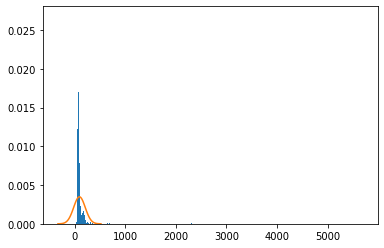

In [113]:
plt.hist(corridor * 1000, bins=1000, density=True)
corridor_points = np.linspace(stats.norm.ppf(0.0001,loc=df['corridor']['mean']*1000,scale=df['corridor']['sigma']*1000),
                 stats.norm.ppf(0.9999,loc=df['corridor']['mean']*1000,scale=df['corridor']['sigma']*1000),100)
plt.plot(corridor_points, stats.norm.pdf(corridor_points,loc=df['corridor']['mean']*1000,scale=df['corridor']['sigma']*1000))

plt.show()

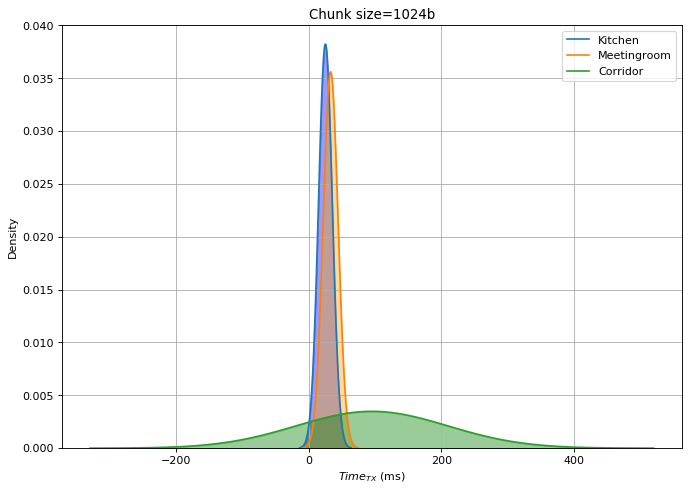

In [134]:
plt.figure(figsize=(10,7), dpi= 80)
#plt.hist(kitchen * 1000, bins=100, density=True)
kitchen_points = np.linspace(stats.norm.ppf(0.0001,loc=df['kitchen']['mean']*1000,scale=df['kitchen']['sigma']*1000),
                 stats.norm.ppf(0.9999,loc=df['kitchen']['mean']*1000,scale=df['kitchen']['sigma']*1000),100)
plt.plot(kitchen_points, stats.norm.pdf(kitchen_points,loc=df['kitchen']['mean']*1000,scale=df['kitchen']['sigma']*1000))

meetingroom_points = np.linspace(stats.norm.ppf(0.0001,loc=df['meetingroom']['mean']*1000,scale=df['meetingroom']['sigma']*1000),
                 stats.norm.ppf(0.9999,loc=df['meetingroom']['mean']*1000,scale=df['meetingroom']['sigma']*1000),1000)
plt.plot(meetingroom_points, stats.norm.pdf(meetingroom_points,loc=df['meetingroom']['mean']*1000,scale=df['meetingroom']['sigma']*1000))
plt.plot(corridor_points, stats.norm.pdf(corridor_points,loc=df['corridor']['mean']*1000,scale=df['corridor']['sigma']*1000))
plt.grid()
plt.fill_between(kitchen_points, stats.norm.pdf(kitchen_points,loc=df['kitchen']['mean']*1000,scale=df['kitchen']['sigma']*1000), 0,
                 facecolor="blue", # The fill color
                 color='blue',       # The outline color
                 alpha=0.4)          # Transparency of the fill
plt.fill_between(meetingroom_points, stats.norm.pdf(meetingroom_points,loc=df['meetingroom']['mean']*1000,scale=df['meetingroom']['sigma']*1000), 0,
                 facecolor="orange", # The fill color
                 color='orange',       # The outline color
                 alpha=0.4)          # Transparency of the fill
plt.fill_between(corridor_points, stats.norm.pdf(corridor_points,loc=df['corridor']['mean']*1000,scale=df['corridor']['sigma']*1000), 0,
                 facecolor="green", # The fill color
                 color='green',       # The outline color
                 alpha=0.4)          # Transparency of the fill
plt.ylim([0,0.04])
plt.ylabel('Density')
plt.xlabel('$Time_{TX}$ (ms)')
#plt.xlim([0,300])
plt.title('Chunk size=1024b')
plt.savefig('density.png')
plt.legend(['Kitchen', 'Meetingroom', 'Corridor'])
plt.show()

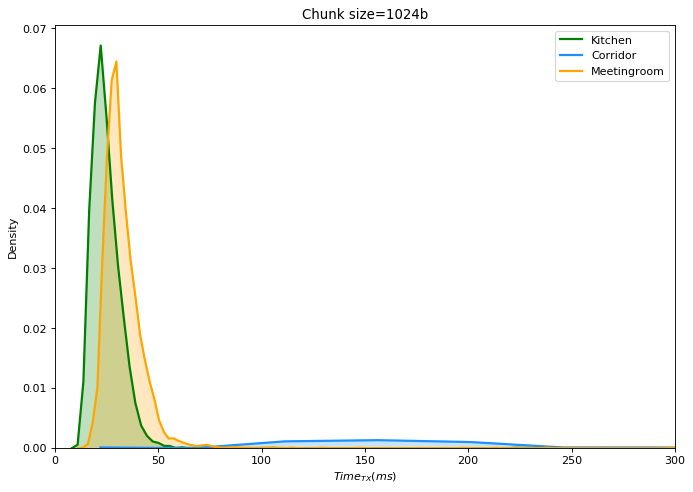

In [109]:
# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2, 'shade': True}, hist=False, kde=True, bins=100)

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(kitchen*1000, color="green", label="Kitchen", **kwargs)
sns.distplot(corridor*1000, color="dodgerblue", label="Corridor", **kwargs)
sns.distplot(meetingroom*1000, color="orange", label="Meetingroom", **kwargs)
plt.ylabel('Density')
plt.xlabel('$Time_{TX} (ms)$')
plt.xlim([0,300])
plt.title('Chunk size=1024b')
plt.savefig('density.png')
plt.show()